In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, scale, StandardScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [27]:
df = pd.read_csv('housing.csv')

In [28]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [29]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:
df.dropna(inplace = True)
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity']]
y = df[['median_house_value']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

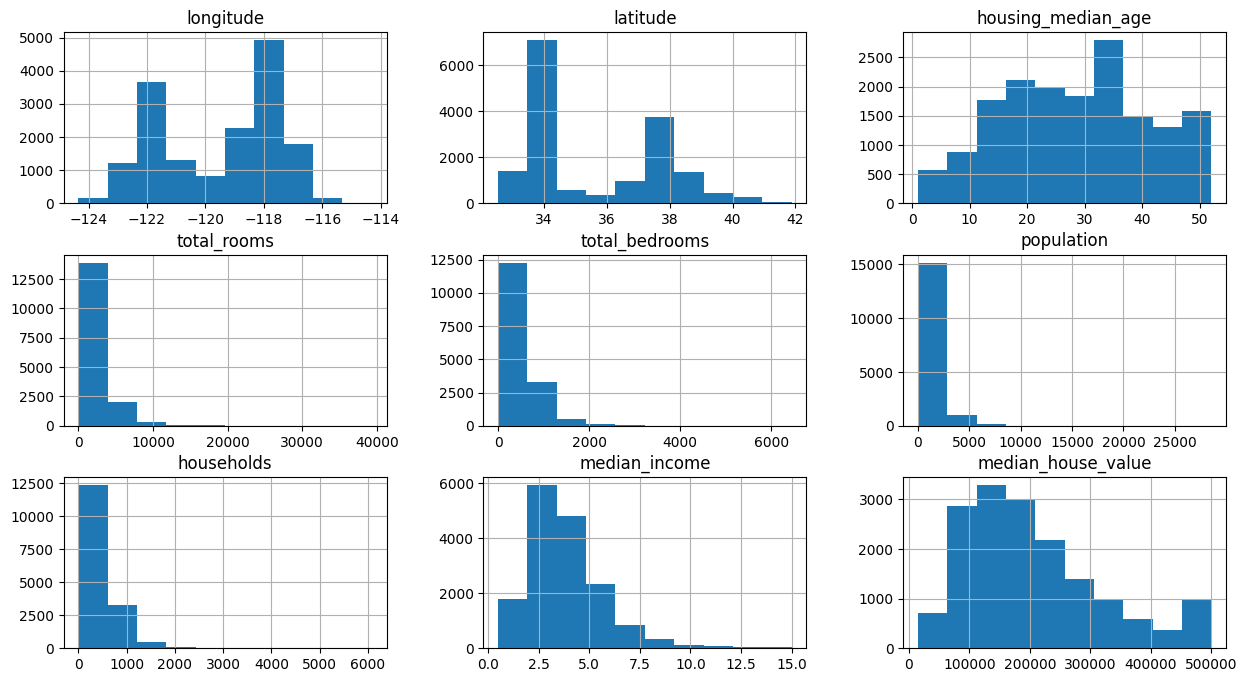

In [33]:
train_data.hist(figsize=(15, 8))

/tmp/ipykernel_11193/1179452894.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<Axes: >

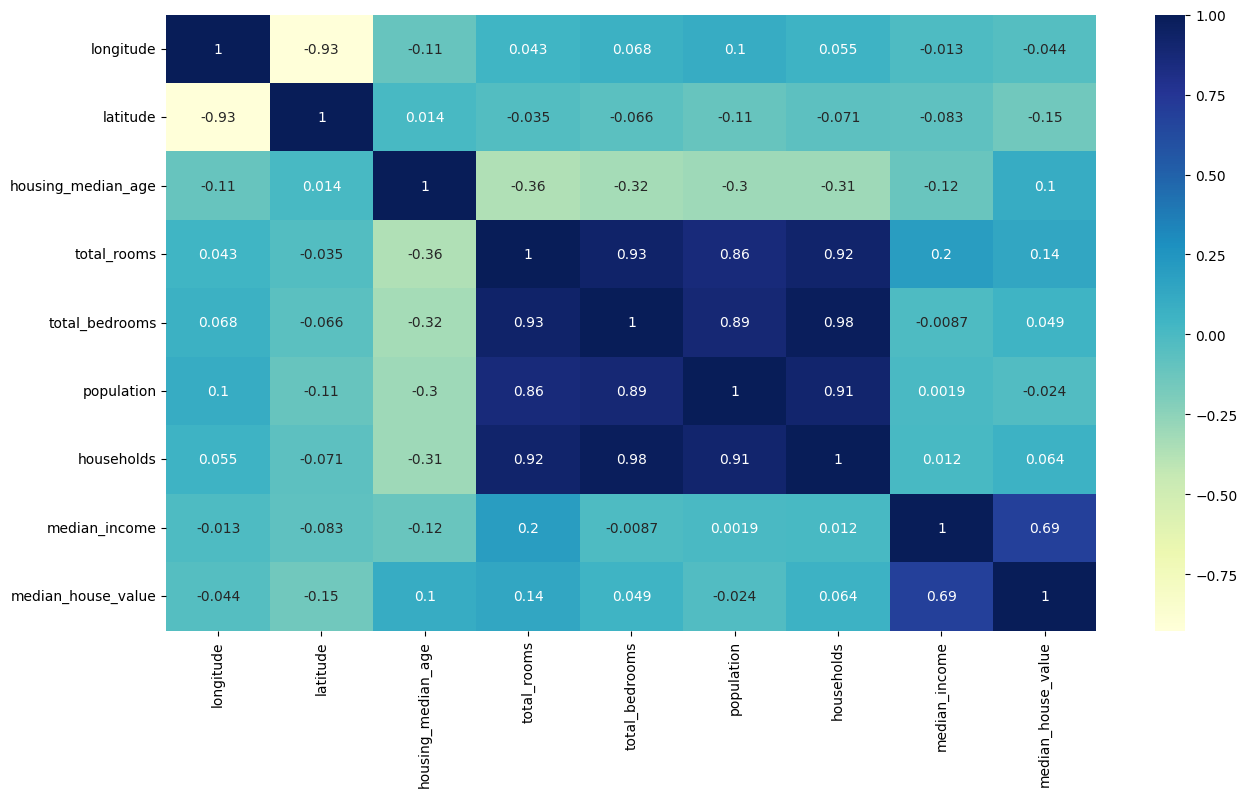

In [34]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [35]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

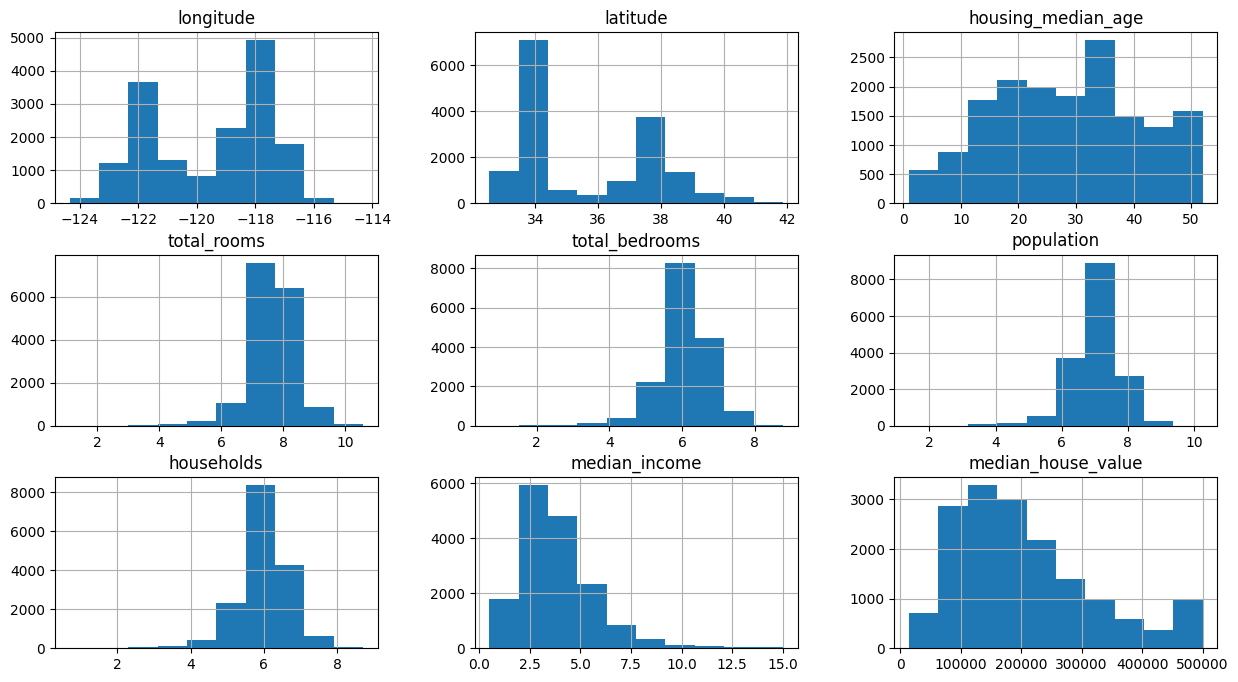

In [36]:
train_data.hist(figsize=(15, 8))

In [37]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7233
INLAND        5197
NEAR OCEAN    2103
NEAR BAY      1811
ISLAND           2
Name: ocean_proximity, dtype: int64

In [38]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1611,0,0,0,1,0
4287,1,0,0,0,0
861,1,0,0,0,0
11287,1,0,0,0,0
20399,1,0,0,0,0
...,...,...,...,...,...
3680,1,0,0,0,0
13254,0,1,0,0,0
15575,1,0,0,0,0
8284,0,0,0,0,1


In [39]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1611,-122.07,37.86,17.0,7.005789,5.416100,5.762051,5.342334,3.5893,206300.0,0,0,0,1,0
4287,-118.30,34.10,29.0,8.132706,7.221105,8.141190,7.069023,1.7083,166700.0,1,0,0,0,0
861,-121.98,37.58,20.0,8.325306,6.939254,7.640123,6.883463,3.6832,216900.0,1,0,0,0,0
11287,-117.95,33.80,34.0,7.411556,5.655992,6.809039,5.680173,4.6389,214600.0,1,0,0,0,0
20399,-118.86,34.22,22.0,7.115582,5.303305,6.513230,5.278115,6.2708,251400.0,1,0,0,0,0


<Axes: >

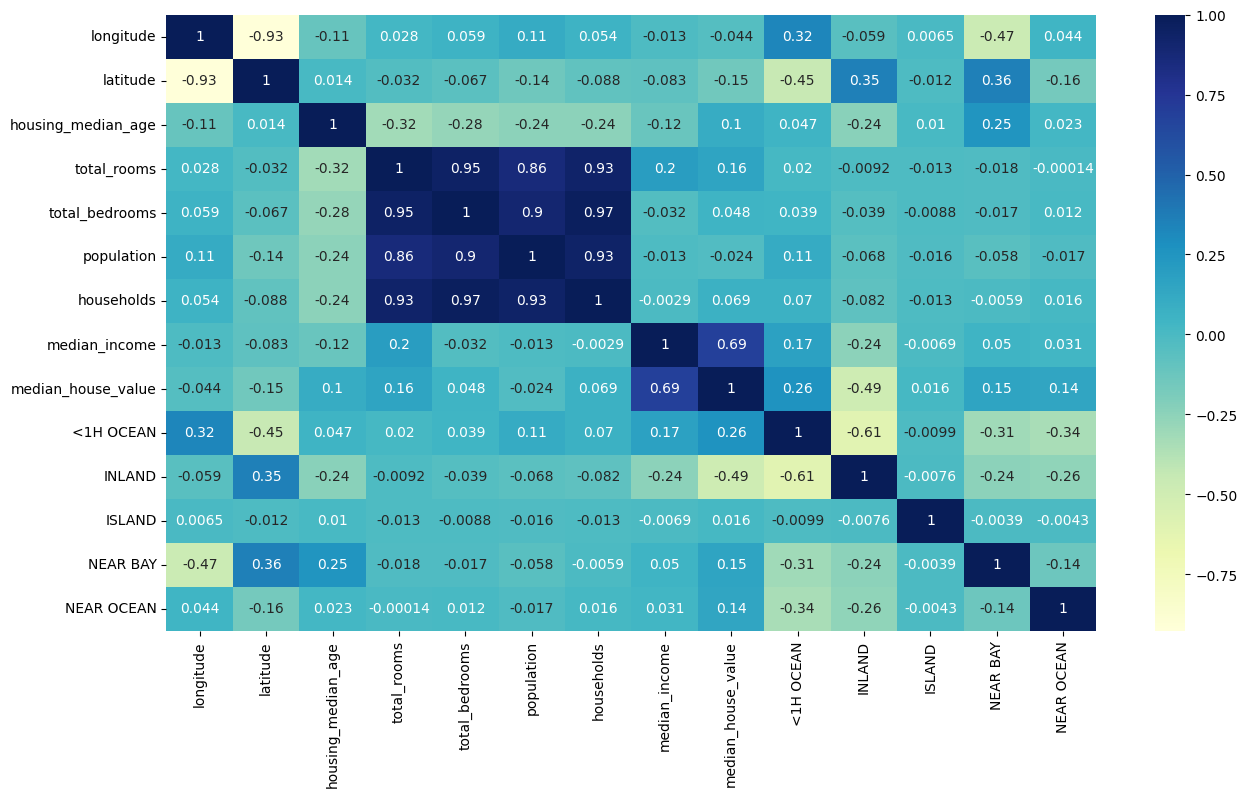

In [40]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

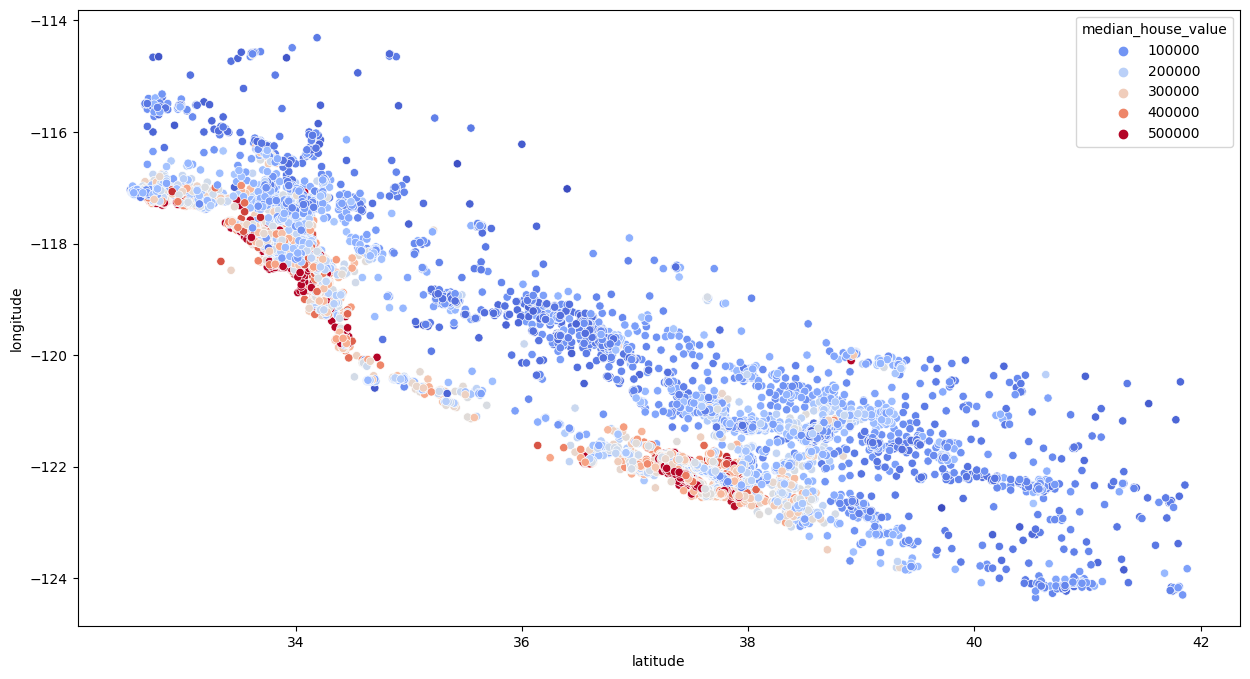

In [41]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [42]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

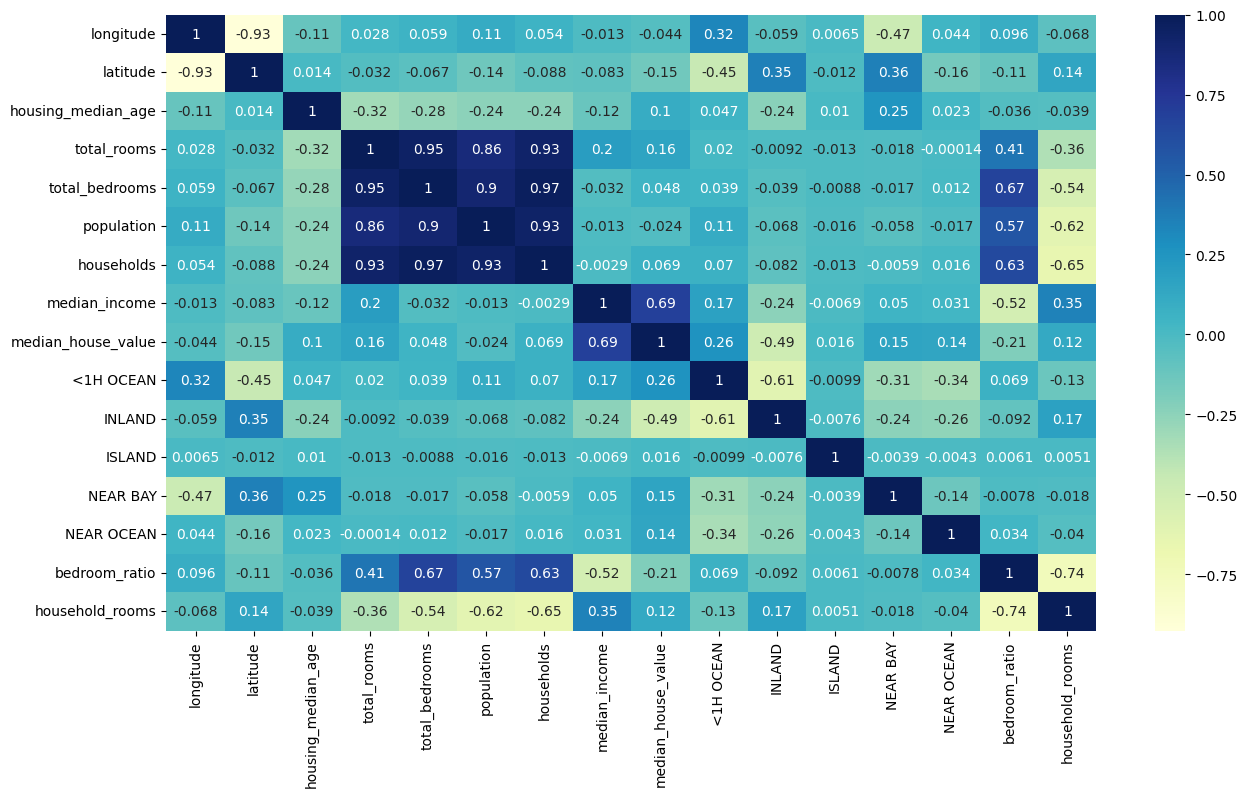

In [43]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [44]:
model = LinearRegression()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

model.fit(X_train, y_train)

LinearRegression()

In [45]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data ['households']

X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [46]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
485,-122.26,37.86,35.0,8.549079,7.464510,8.094684,7.463363,1.6307,253600.0,0,0,0,1,0,0.873136,1.145473
5117,-118.28,33.96,34.0,7.637716,6.333280,7.556951,6.244167,1.6156,102100.0,1,0,0,0,0,0.829211,1.223176
9665,-120.12,41.40,33.0,7.944847,6.246107,6.884487,6.001415,2.6062,52600.0,0,1,0,0,0,0.786183,1.323829
18828,-122.64,41.95,18.0,7.532624,6.052089,6.688355,5.752573,1.8242,53500.0,0,1,0,0,0,0.803450,1.309436
398,-122.29,37.89,52.0,6.887553,5.170484,5.926926,5.036953,5.1675,270600.0,0,0,0,1,0,0.750700,1.367405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17970,-121.96,37.32,11.0,7.445418,6.202536,6.998510,6.298949,3.7300,227700.0,1,0,0,0,0,0.833068,1.182009
8640,-118.40,33.87,26.0,8.811801,7.273786,7.938802,7.240650,5.2276,434500.0,1,0,0,0,0,0.825460,1.216990
5905,-118.42,34.29,34.0,7.306531,5.789960,7.237059,5.749393,3.4821,160300.0,1,0,0,0,0,0.792436,1.270835
3909,-118.52,34.20,37.0,7.493317,5.849325,6.987490,5.872118,4.9102,207200.0,1,0,0,0,0,0.780606,1.276084


In [47]:
model.score(X_test, y_test)

0.6783417690352207

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6783417690352209

In [50]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
forest.score(X_test, y_test)

0.802847433798481

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [30, 50, 100],
    'max_features': [8, 12, 20],
    'min_samples_split': [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

In [55]:
best_forest = grid_search.best_estimator_
best_forest.score(X_test, y_test)